In [1]:
import datetime as dt
import mplfinance as mpf
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
plt.rcParams.update({
    'font.size'      : 16,
    'axes.grid'      : True,
    'grid.linestyle' : '--',
    'figure.figsize' : [12, 4]
})
import yfinance as yf

/home/bitwalk/MyProjects/stock-explorer/venv/lib64/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[*********************100%%**********************]  1 of 1 completed


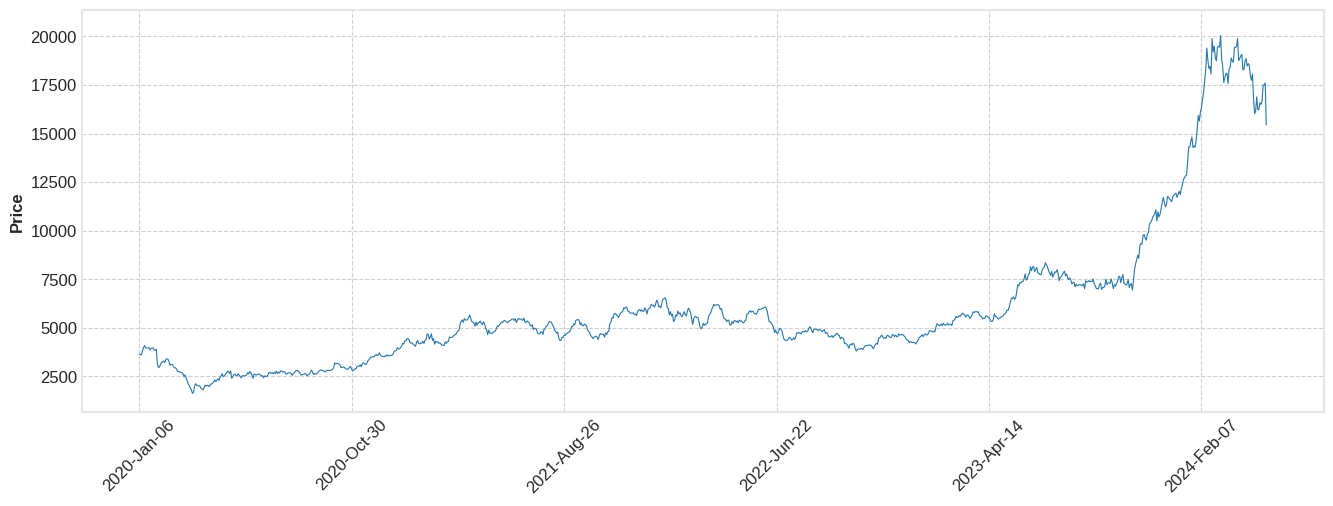

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-06,3640.0,3680.0,3625.0,3645.0,3338.841309,825000
2020-01-07,3655.0,3670.0,3610.0,3615.0,3311.361572,958200
2020-01-08,3590.0,3630.0,3510.0,3605.0,3302.201172,1612200
2020-01-09,3795.0,3865.0,3785.0,3825.0,3503.722412,3072000
2020-01-10,3845.0,3980.0,3825.0,3980.0,3645.703857,1981400
...,...,...,...,...,...,...
2024-05-02,16370.0,16740.0,16165.0,16640.0,16640.000000,1444300
2024-05-07,17175.0,17505.0,17070.0,17500.0,17500.000000,2186300
2024-05-08,17300.0,17565.0,17155.0,17500.0,17500.000000,2109700


In [2]:
start = dt.date(2020, 1, 1)
end = dt.date(2024, 5, 11)

#ticker = '6920.T' # レーザーテック
ticker = '7735.T' # スクリーン
#ticker = '8035.T' # 東京エレクトロン
#ticker = '^N225'
#ticker = 'USDJPY=X'
df0 = yf.download(ticker, start, end)
mpf.plot(df0, type='line', style='binance', figratio=(12, 4))
df0

In [3]:
df = pd.DataFrame({'ds': df0.index, 'y': df0['Close']}).reset_index(drop=True)
df

,ds,y
0,2020-01-06,3645.0
1,2020-01-07,3615.0
2,2020-01-08,3605.0
3,2020-01-09,3825.0
4,2020-01-10,3980.0
...,...,...
1057,2024-05-02,16640.0
1058,2024-05-07,17500.0
1059,2024-05-08,17500.0
1060,2024-05-09,17600.0


In [4]:
m = Prophet()
m.fit(df)

05:56:39 - cmdstanpy - INFO - Chain [1] start processing
05:56:39 - cmdstanpy - INFO - Chain [1] done processing


In [5]:
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
1087,2024-06-05
1088,2024-06-06
1089,2024-06-07
1090,2024-06-08
1091,2024-06-09


In [6]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(14)

,ds,yhat,yhat_lower,yhat_upper
1078,2024-05-27,19644.118733,18626.891556,20677.241771
1079,2024-05-28,19709.191822,18699.423706,20697.550319
1080,2024-05-29,19769.946482,18794.809971,20835.221039
1081,2024-05-30,19837.864114,18821.314512,20864.081888
1082,2024-05-31,19872.072338,18868.245351,20833.122111
1083,2024-06-01,20561.482538,19573.176932,21544.265148
1084,2024-06-02,20610.879955,19561.777448,21617.311934
1085,2024-06-03,20009.375127,19020.417455,21010.874168
1086,2024-06-04,20064.667810,19028.984068,21103.906513
1087,2024-06-05,20115.788767,19093.632495,21115.538188


/home/bitwalk/MyProjects/stock-explorer/venv/lib64/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/bitwalk/MyProjects/stock-explorer/venv/lib64/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


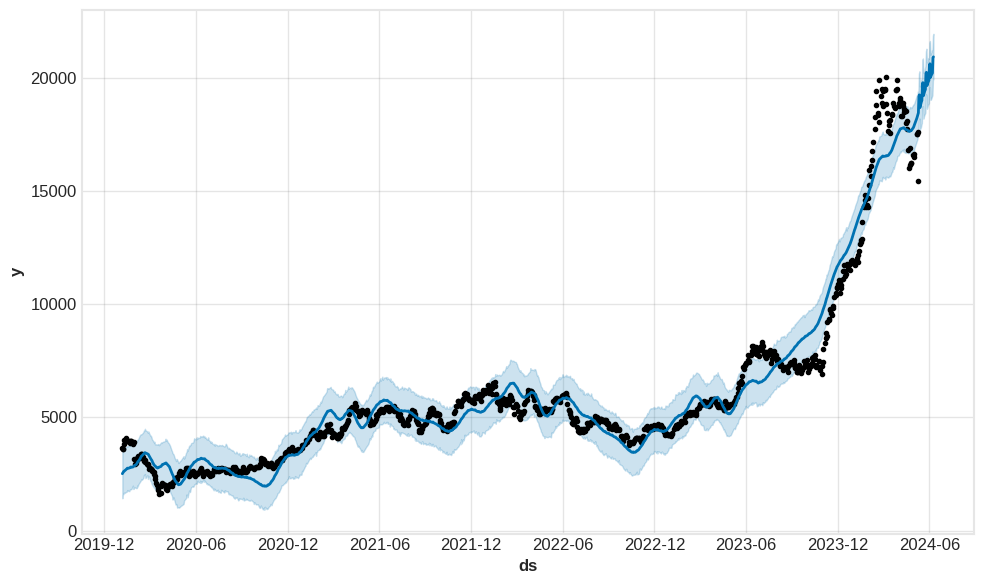

In [7]:
fig1 = m.plot(forecast)

/home/bitwalk/MyProjects/stock-explorer/venv/lib64/python3.12/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/bitwalk/MyProjects/stock-explorer/venv/lib64/python3.12/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/bitwalk/MyProjects/stock-explorer/venv/lib64/python3.12/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Se

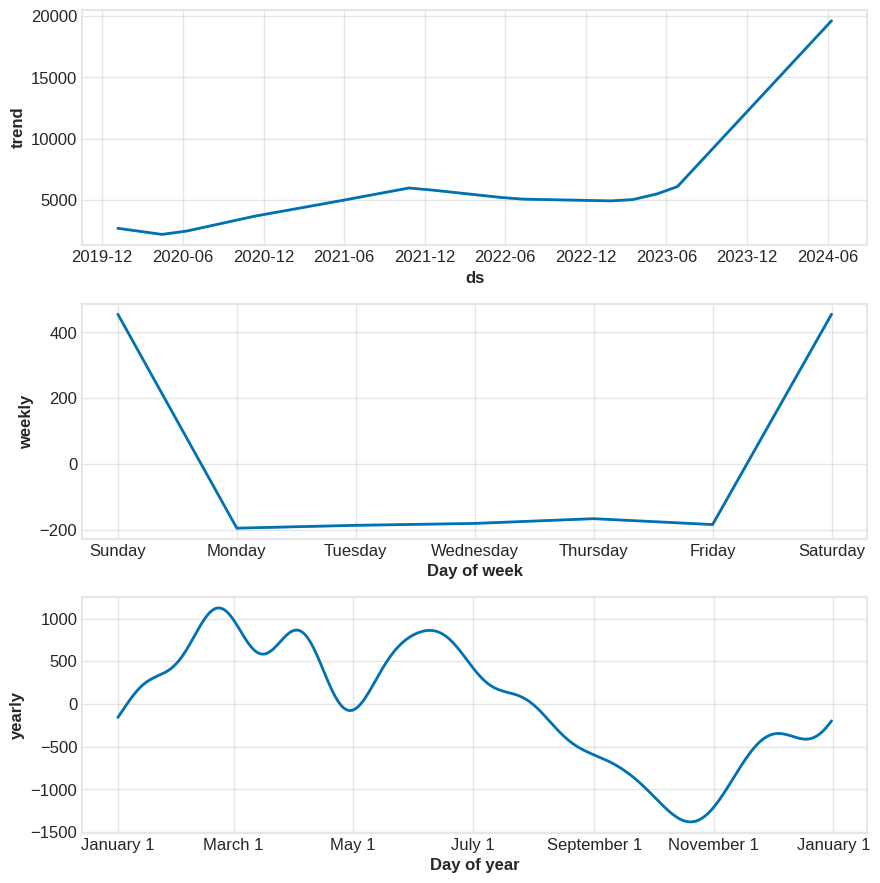

In [8]:
fig2 = m.plot_components(forecast)